# Drag Polar

This section builds a drag polar model for the example airplane. During conceptual design stage, a simple drag polar model is used, written as

$$
    C_D = C_{D_0} + \frac{C_L^2}{\pi Ae},
$$

where the first term denotes parasitic drag (computed in previous section) and second term represents induced drag. The $A$ stands for aspect ratio and $e$ refers to oswald efficiency factor. The aspect ratio is set to 8, which was assumed during initial weight estimation. The oswald effciency factor is computed using (Raymer equation 12.48):

$$
    e = 1.78(1 - 0.045A^{0.68}) - 0.64
$$

Once required parameters are known, $C_D$ can be computed for a given value of $C_L$. The model developed in lift section is used for computing $C_L$ for a range of angle of attack. Then, $C_L$ values are used for computing $C_D$.

Below code block computes drag polar for the example airplane in clean (cruise) configuration:

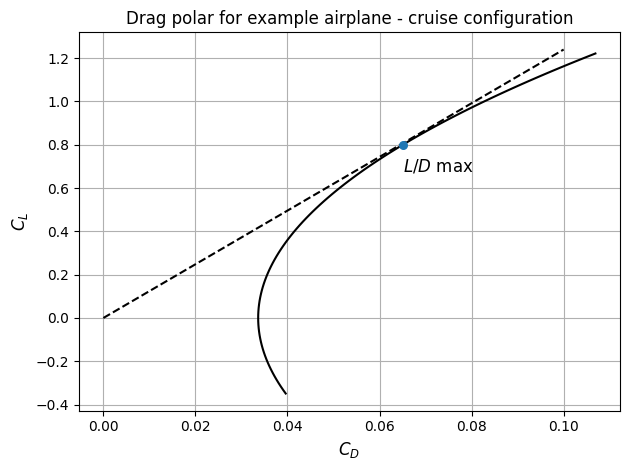

In [26]:
import matplotlib.pyplot as plt
import numpy as np

A = 8
e = 1.78*(1 - 0.045*A**0.68)-0.64
alpha = np.linspace(-5, 13, 100)
alpha_CLzero = -1.0
CLalpha = 5.0
fs = 12

CL = CLalpha * (alpha - alpha_CLzero) * np.pi / 180
CD0 = 0.03363
CDi = CL**2 / np.pi / A / e
CD = CD0 + CDi

fig, ax = plt.subplots()
ax.plot(CD, CL, "k-")
ax.plot([0.0, 0.1], [0.0, 1.24], "k--")
ax.scatter(0.065, 0.8, zorder=10, s=30)
ax.set_xlabel("$C_D$", fontsize=fs)
ax.set_ylabel("$C_L$", fontsize=fs)
ax.set_title("Drag polar for example airplane - cruise configuration", fontsize=fs)
ax.annotate("$L/D$ max", (0.065,0.7), fontsize=fs, ha="left", va="center")
ax.grid()
plt.tight_layout()

As indicated in the above plot, the point where line from origin is tangent to drag polar refers to maximum $L/D$. The example airplane has a maximum $L/D$ of 12.31. This concludes the drag polar section. In next section, high-lift devices are sized, and the drag polar and lift model are updated accordingly. The corresponding drag polar in takeoff and landing configuration are also plotted.